In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('data/match_playerPUUIDs_timestamp_ProPlayers.csv')
df.columns = ['match_id','player1', 'player2', 'player3', 'player4', 'player5', 'player6', 'player7', 'player8', 'player9', 'player10', 'timestamp']

df['player1'] = df['player1'].apply(lambda x: x.replace('([', ''))
df['timestamp'] = df['timestamp'].apply(lambda x: str(x).replace(')', ''))

for player_number in ['player1', 'player2', 'player3', 'player4', 'player5', 'player6', 'player7', 'player8', 'player9', 'player10', 'timestamp']:
    df[player_number] = df[player_number].apply(lambda x: str(x).replace(" ", "").replace("'", ""))


df.head()

,match_id,player1,player2,player3,player4,player5,player6,player7,player8,player9,player10,timestamp
0,5860157180,0dzqDyAd3j7-v5dm7uqQTYMYPUXIshFVnc7w5p9QGWxnU5...,raIkCGpDSc9UBorYEE2KXUU4uRlf0lDm6Zq-iR-fxO5P0D...,xWKWVApp1mvojSg9JZVyjrELgPxlwrGAvTn5BKuXdpUaGx...,q5aJfozSKwuy3zpmyotks3D-NrzP2IaqSsKpZBjJan9MNI...,cCELmgk7AW9aePkC-J0vddano3zPXGsVd_f3NL5uCVVoaV...,ReOlBLEqfPHhJERLyzbRu2L1J2yKjOP-J3LWVJRkhi5yO8...,qwFHLab5iv7A6XRoI8EoQ9AsWwOwTte4BSi5RR7WIvxh9k...,LKeh_TBiEFYyjz-B7uHdaS7O2jVtD_qtYvPTY9SqZKc5Cy...,_ICuwdO4jAMEj8WrPijiDfuvVrnmxKcYbBWO6mWheGSwki...,QAUaYN4oIfBTiCbwGjJQ6Wsc-fQhjWdG63KPNKYEqdAsxM...,2022-05-07T12:53:17+00:00
1,5860193059,HHIn3MsOsdbqZpxwkhOPUk9JNJu6_GBPoTLkFuZTgIuBhs...,ROxncTgMyUmjfw2s0oGMpf7jTXqmLHRQF6odSLWD0EXSm_...,LKeh_TBiEFYyjz-B7uHdaS7O2jVtD_qtYvPTY9SqZKc5Cy...,BUmF0AlmReYrcdWMXQBH_mdLWG5_FPn67ks-OV7iTwP14m...,BiaUCOlJZuwAY1gOEaat5jsRtkcwcA9Vdtle45ifsO88dy...,Z8T3ujl7LSsCGjeh0Hq8VWi-5ZAXYFlTQQUUkgdZYfDzPV...,diMFo_QikwrLjEK-TUySDDFkimsTOpAifmgsil0XF8SGJO...,Xu4pE7QNNHfPi16x8FeZIL9VFLj-0_Al5iNr7OTpD03J1k...,m-g7jtVOtCObWWh2mCK0o8XD-fsL7XL-rhIdpJGMM-YsNb...,ma0H1zkuWLR1g2HmP9fva5CTD0yk6ZvS4H8BuoCHvbEMZo...,2022-05-07T12:28:32+00:00
2,5860101282,NtaeqFFIGCpibRu4nrmXmih6yJ2hBGkNyF6sf7QBBtTXlf...,zqtgK7-SzgdDCiFhUfL4bpd85FtghClccM5ExpgdANCUBy...,LKeh_TBiEFYyjz-B7uHdaS7O2jVtD_qtYvPTY9SqZKc5Cy...,i1JqEgUHGsua1JmlxX-M1O6IqmdASZ-xN0JuPbQsF7PdOD...,F9JbU-21PNM8mHQnrZBeXZWpO2DQa9NlI84XDrLuLljej7...,dtJAGyUezLjqd5FWW3SJYLdw8W8tHBVeV5WYanQPWjHgMO...,OiAsFrRwfzKoOuHY5HehZc-ORoQGBg08p4eIH3VBEcUuxW...,Z8T3ujl7LSsCGjeh0Hq8VWi-5ZAXYFlTQQUUkgdZYfDzPV...,aHCWeE_FXjBThq1NXYPrxHEupUSh29ZagVZB_pzTiMAF7c...,mGuU9x_AS5boWBV3bN1FVswv90NpAe-5MJcf3BKCF3IbDf...,2022-05-07T11:56:54+00:00
3,5857587216,Kmtv1nNQhRKyXV-FqDIBEIO1WhPA5LPOjAvsnRldYlQcXv...,CCM65yZpGCh-fuyQQ0r2QofGghs04V_pyHYs7Qw_p2AopI...,LKeh_TBiEFYyjz-B7uHdaS7O2jVtD_qtYvPTY9SqZKc5Cy...,M91ZfWfqy9PfacFsQTS0bBmL5lVgSQvqJKxfl4pGyKH5jE...,iG77Qs75xNXp32mL0H9KP5sC9m54Gfw0uAwD30OVdTLFV0...,HyCXRqx-OtAoB-bhfplrCC4ndZosMgzoU_HtOPiAjhlLIA...,LMKyGddHc5Qjjm6psqF6geC8SbPW8pk11VsUu8PwaAaI0h...,jjNF_pCb97MehLn7Zpx1MyTBSOxKtSr3k7_x3NaqtRrS9W...,TYGyZkoqm0ESN3eDLDzKSPHnUKcXFiuXtCd7X0vLBZbHsS...,q13Fw1Gp_BAG4IqSPlziGUL9fNFs40NSjM_QHExZlORp77...,2022-05-05T18:52:11+00:00
4,5857552650,LKeh_TBiEFYyjz-B7uHdaS7O2jVtD_qtYvPTY9SqZKc5Cy...,y_wanYI4lMPOfJwnr1QZFPwjS4QDae-HE8UrA-b5kOyQa-...,M91ZfWfqy9PfacFsQTS0bBmL5lVgSQvqJKxfl4pGyKH5jE...,iG77Qs75xNXp32mL0H9KP5sC9m54Gfw0uAwD30OVdTLFV0...,Kmtv1nNQhRKyXV-FqDIBEIO1WhPA5LPOjAvsnRldYlQcXv...,6b_BRmNrfL7Cy9alDC-2HVaCWA8rn0OzBUVcRG9ULfMcji...,B7MYGcWcPJkW_XIrmM2CZYRPvQLgHJ_gHNISKyj1Q-E5Ck...,kGufVOFCkn6Z_KkX4q5JhINtHKkeGF8LomQ5XlOvXYVQB-...,6_re5a4AK9kWyJpBmZDbUQPHEZPwwCaCk6RSEd3ZAhlmm8...,yRV11GCIoBLOKPPfx5wtPwvzauWduG9MUULMrgkcHS_WlL...,2022-05-05T18:22:17+00:00


In [3]:
df = df.drop(df.loc[df['match_id'] == 0].index)
df = df.sort_values(by="match_id", ascending=False)
df.head()

,match_id,player1,player2,player3,player4,player5,player6,player7,player8,player9,player10,timestamp
48411,5861230888,ZLCjP1dZUnqNDZTvpaZyAloBEMOx6rYkj3k1BARtW6d5MB...,_BkZGRZBt1_rueL6T0yhLr3XIqKdYh1Z9MZYpWO93Ayek1...,dwRQhOQ2GYyaIUk_R2NVutdU6hECTADjsmeRkmfWJ8OL-6...,7E0JOpDGbtW8myHc_KrJpXZWa0Wd2zczOAdMkIoBEwYkYE...,rF_qRWbAxBs47tumOG0e6Dp_6s92WXAoxgi077t5XKYf48...,bb69hqwLSgyw18SNTPGwvvxiP1VsmwLt2-Z0blZFqFyEm9...,2Rc7xelPVLWRZ3T7IkNFTrdPg-_XYoJfJyzUhs_FU_lIg0...,3YcOF5etq_9PgfTX9xWDUp5Zv1bnBNJCPL7bkGUU3t8E07...,SQFsdwVRaT7akpVRhRoiBb9iyuM9t4vC_08lEGdycsz7DS...,WX1ao31lMFf4SS8iVCTcTLc0unpKQGg0KEjvGbN0VRL6UB...,2022-05-08T05:21:39+00:00
48048,5861230849,iiD9IYOfYxjKBL12HdIbkC8mwUVXJ4QC4APCsvrRsrU2XH...,FREwOnvAvoqHLkYFEPcRWlaYLbfw93yvfIZlKbMDm-WULA...,ok3Pwzxd_70hKgVirEkwbKdKr83lYuJhLdZ2b5PEFT1Nt4...,3NVShdMxavRF4GAI3rRRLYE5tgOj_fXZHWKZNmAvLbiMSc...,f9Dsfp7MURjr-I_NVTH-zfgfhCVHCDeYyxgZGdN3m50Km-...,QgMgWewtvf79KmskmjNQd8Y2bF2hphOXhuy82sMFRvCamz...,v-Xx7497f_KgOEy2I8vuAQxeKMoCZTWIvBvOotglaSU6La...,J-Vyz-CQaMAIlqti0t6k3fYhegTRweP1-9B2y9JU5SjuUS...,iE5Ti1uxe2_IBokmfL05ucXVtCAbTuRv08r57gCABeKxnE...,3bc-VN0D1WPOIAsvQ1YRbZJrGKMw2Lvbn0aXvt0tfV8gaT...,2022-05-08T05:20:31+00:00
48265,5861220802,38t-oFoxFvtis2yI_lfhViRVoeSD4Yg1rXPlsXz-PT-8aK...,FZVl2wjRd6xrpdJM4ZteCdO5N3x_rOlYZkDrzs3K8KLVOf...,0QFgV-v_-Fea53tPbe2c3csIgLPzjxUqkGqVaD4r2j-8Ua...,uH9fb6m4E009clzZE_syjeIQbjj31WTQwcXFh6oxwjYYXV...,zREBP1L4X4daV6vXCaPyD60njNq2ldtap2oS4FF2iKA0Ie...,HDHduEaBnSL78p9SICKBtXpKyBH7I_fOkYIJ7Ti5oV1Hri...,rfK8lpfjV0LW2NC7l9LRmMVJ3cepGiQvnBJJeCia_0jDiB...,HaB9gu6EBJZ4ANiI4pCPjx4qo4DIaQES750tETdnlL1-yc...,6pGH-S57vOfesyRD_8VU1NJsNeC7gqEfl31SCQldy9bZpN...,2JvtNf8r_CJTF8ZxmEn52oMHRY299wW0V8cBOEbyF5b6dt...,2022-05-08T05:11:46+00:00
46153,5861197031,tiiCZAp__zaiO6WjTZxfEea22t10epKnzpUp47v_qX4p9a...,y-KjO1dSr-5cxFB2nhg5q8LsIMZLWf2IPkq_FHDdJ5ONCe...,fUrG1qXI4WfLVJFjarcUZAd_CsW_U9oO2NINwzP2qGpWBo...,aiv4iRd-Y2FdJ-Hm42fNc-l4XA43WDIF2_lNQvlD7nXBS8...,okrsXaIrxX4VoG9Ym729pOyM9yCpcBq6b2iHZAGsce_cur...,He9ky7rm8RyDMGCPdwy9Rd6awJ931HSx4W3BVlpqaeiJDJ...,SqHAsInW1qomdNKwZ3_dvaYkBiEhzD60EXvYpTHRgoIu64...,mjkW7YNRGxJWoBkWRPhwuKG0d_EsM3_tjnuFl1JqEE8EL2...,hF5uW4zXOeTr67ezKQS_UP-NaplaTSBqbAAxODEE40HJId...,Sjvk9EFB4XZihoCqQGXcyRITzUC9a2EBwdPGOaftVvz-Gg...,2022-05-08T03:45:40+00:00
48303,5861196728,Kgm_qNwl9DbGe2WfOBoB2_No5C_5W3gfaKqDSKzgpQbGm1...,nHrbRadcznrhCQQYXMOlP28SEgAmQJ4QUJbDGoVOgi32XC...,tJZgx6hY-qwA1oEuooXq8id_NEF7FcDIO1e58uKzMMhZA_...,oF6hgIg-5QWpvWjq-74JzhFRn5f3klGKEzPRwph5uX1767...,0igbdu5GEx-E0pHmMGyrvhMFBRS31g16FYKznJZmuFe2pl...,ke2eNfMnMiceAFC-mClY04pGng8DsiDq7KOfHhxSK0wVRe...,6kABBEEzipHdszEB2OGLL8f8xYu2z-4Ulqh6nw4rPe_Fi2...,YH77JXeQP30sbqRzjaff4OkCaoMJEjgRB7ldXt2Eg4nauh...,J74qiXPjEtF3pzR0qFAds2mRuFq5pfGdzfwzMWEDPVScGl...,rOAcuGDM14umJ1XQIjHx8J--tejlev0Py6JhdA6fpaYjvw...,2022-05-08T03:32:19+00:00


In [4]:
import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'] )
df['timestamp'] = df.timestamp.values.astype('datetime64[D]')

In [5]:
times_per_day = df.groupby('timestamp').size()
print(times_per_day)

timestamp
2021-06-23        1
2021-06-24        2
2021-06-25        1
2021-06-28        3
2021-06-29        1
              ...  
2022-05-04     4786
2022-05-05     7560
2022-05-06     9967
2022-05-07    10287
2022-05-08      458
Length: 118, dtype: int64


In [6]:
times_per_day.describe()

count      118.000000
mean       414.449153
std       1581.379435
min          1.000000
25%          2.000000
50%          9.000000
75%         45.750000
max      10287.000000
dtype: float64

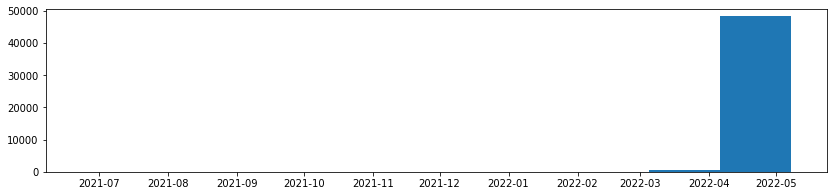

In [7]:
plt.figure(figsize=(14, 3))

plt.hist(df['timestamp'])
plt.show()

In [8]:
df_melted= (df.melt(['match_id', 'timestamp'], 
                       var_name='player_number',
                       value_name='player_puuid'))

In [9]:
df_melted['timestamp'] = pd.to_datetime(df_melted['timestamp'] )

In [10]:
df_melted['timestamp'] = df_melted.timestamp.values.astype('datetime64[D]')

In [11]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490740 entries, 0 to 490739
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   match_id       490740 non-null  int64         
 1   timestamp      489050 non-null  datetime64[ns]
 2   player_number  490740 non-null  object        
 3   player_puuid   490740 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.0+ MB


In [12]:
df_melted.head()

,match_id,timestamp,player_number,player_puuid
0,5861230888,2022-05-08,player1,ZLCjP1dZUnqNDZTvpaZyAloBEMOx6rYkj3k1BARtW6d5MB...
1,5861230849,2022-05-08,player1,iiD9IYOfYxjKBL12HdIbkC8mwUVXJ4QC4APCsvrRsrU2XH...
2,5861220802,2022-05-08,player1,38t-oFoxFvtis2yI_lfhViRVoeSD4Yg1rXPlsXz-PT-8aK...
3,5861197031,2022-05-08,player1,tiiCZAp__zaiO6WjTZxfEea22t10epKnzpUp47v_qX4p9a...
4,5861196728,2022-05-08,player1,Kgm_qNwl9DbGe2WfOBoB2_No5C_5W3gfaKqDSKzgpQbGm1...


In [13]:
df_melted.to_csv('df_melted_pro_players.csv')

In [14]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490740 entries, 0 to 490739
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   match_id       490740 non-null  int64         
 1   timestamp      489050 non-null  datetime64[ns]
 2   player_number  490740 non-null  object        
 3   player_puuid   490740 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.0+ MB


In [15]:
df_melted.isnull().sum()

match_id            0
timestamp        1690
player_number       0
player_puuid        0
dtype: int64

In [16]:
# group players
players = df_melted.groupby('player_puuid').count().sort_values(by="match_id", ascending=False)
players.head(10)

,match_id,timestamp,player_number
player_puuid,,,
nan,1143,0,1143
BOT,218,204,218
OlfQQY21G1tZpUE9h3gCHFkTb3EaveilTZ-n84Zqpqr1dKUhU5Bn023kmMqbR1dWWzGqWWpBQqa9Cg,160,160,160
BMztWzgrDKWeoKlaiZQuSkYO6G7ZiiKiEeWnkZfflb-F0NlnpjMHX5MsTjczjfynv0AFrefW9k5bng,150,150,150
A8q1zi-vigNquI6npWREXDcoQMb3VJb53gVkHxDHL2_eZ6pY97vBQbSng1iuSdiD9WS57C6IvEAbjA,143,143,143
T_qCUTboIZV00ufO2mo_aDY0o-C8TKGpu1hd9aYRIoj48_yPfG_Ragyv7kVDk5-YJePMo0taMEHBEA,139,139,139
oRNqUl1ldmfd6Ntp8LJX6hUitRU233KM1U7GGuR2SuMVzSZXJ3X4J3jjESbq_eIjfPruJSXDXqG3Xw,136,136,136
0B13O07euVqqMJqGr_Gyvw2Pm8dHx2MD4dLtyZV2U_yTMg089cSd3WThyDe3ZJVHAI1z57ZpjW8zgA,133,133,133
bBGlHmI5CCLspbWI_hpPIU7JiArTXp-btbmRis6h9vusmwtSpyhA1Sx9fMXt-gFza_4kvwYtCF0aQQ,131,131,131


In [17]:
G = nx.Graph()

for index, row in df.iterrows():
    for i in range(1, 11):
        for j in range(1, 11):
            if i != j:
                node_i = row["player" + str(i)]
                node_j = row["player" + str(j)]
                
                if(node_i is not None and node_j is not None and node_i != node_j):
                    if(G.has_edge(node_i, node_j)):
                        G[node_i][node_j]["weight"] = G[node_i][node_j]["weight"] + 1
                    else:
                        G.add_edge(node_i, node_j, weight=1)

In [18]:
print("The graph has " + str(len(G.nodes)) + " nodes(players) and " + str(len(G.edges)) + " edges.")

The graph has 117255 nodes(players) and 1624508 edges.


In [19]:
from random import sample

new_G = nx.Graph(G)

num_to_remove = int(len(new_G) / 2)
nodes = sample(list(new_G.nodes), num_to_remove)
new_G.remove_nodes_from(nodes)

# remove low-degree nodes
low_degree = [n for n, d in new_G.degree() if d < 10]
new_G.remove_nodes_from(low_degree)

# largest connected component
components = nx.connected_components(new_G)
largest_component = max(components, key=len)
H = new_G.subgraph(largest_component)

# compute centrality
centrality = nx.betweenness_centrality(H, k=10, endpoints=True, weight="weight")

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

Code below takse > 3 hours

In [ ]:
#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx_nodes(
    H,
    pos=pos,
    node_color=node_color,
    node_size=node_size,
    alpha=0.4,
)

for edge in H.edges(data='weight'):
    nx.draw_networkx_edges(
        H,
        pos=pos,
        edgelist=[edge],
        width=edge[2],
        edge_color="gainsboro",
        alpha=0.4,
    )

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("LoL match history network", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
#fig.tight_layout()
plt.axis("off")
plt.savefig("graph_sampled_pro_players.png")
plt.show()

# Basic Network Analysis: 
Degree distribution, average clustering coefficient, diameter and centrality.

In [20]:
print(nx.info(new_G))

Graph with 15970 nodes and 254436 edges


C:\Users\Tuana\AppData\Local\Temp\ipykernel_10340\1107077670.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(new_G))


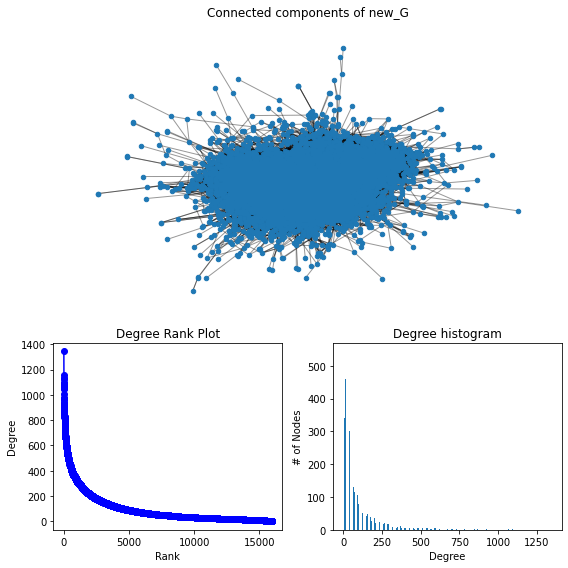

In [21]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#G = nx.gnp_random_graph(100, 0.02, seed=10374196)

degree_sequence = sorted((d for n, d in new_G.degree(weight="weight")), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of G", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = new_G.subgraph(sorted(nx.connected_components(new_G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of new_G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

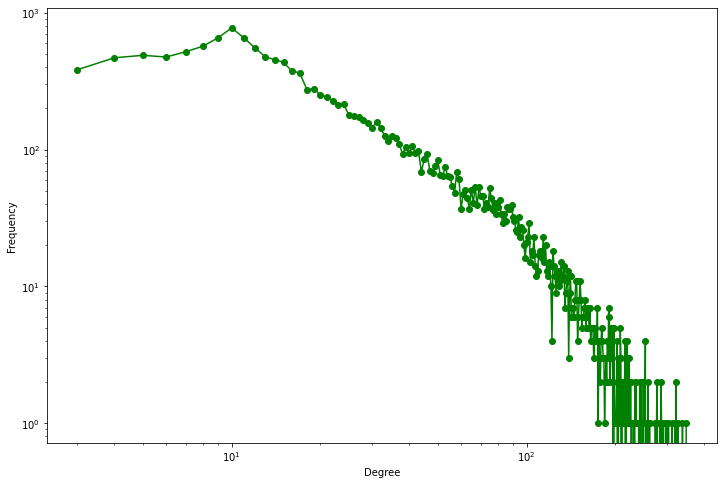

In [22]:
degree_freq = nx.degree_histogram(new_G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[3:], degree_freq[3:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [23]:
sorted(new_G.degree(weight="weight"), key=lambda x: x[1], reverse=True)

[('nan', 1344),
 ('zJx-RkXHAZAH-4U6Z2vK4Iz0oDEwCnc_LcoDH7snzvl8WtP5hewRBqXIoszFuNaYnaUWAQ7lwPOrKQ',
  1158),
 ('L5pS_brtV6RNmtAHYVdlrpVr8U6y64qd-3BSpVUywkghq9Z5VJCueDpT6zrrTeYoYgKmFU0ihfEhrg',
  1134),
 ('GrEW5FRYKRxeCMkX110BSyXpsY0RkSr9X402tNbq6aiTYzM3NIyT7QSbk_kjsdDfGKJVlDtyXWrLrA',
  1128),
 ('B1zlj3Pd1iLkJX5ROpXd6isuQC0heTafKJF-Y3KfplU4skf9IrRufb81idUWD5OUcUyypxbO1mw-Sg',
  1098),
 ('sNFVUkGeobWKQnnJ20VkyJkSNMv94VQ9LRkMZMwGrNgskKbxxkYjfY-Stuj6OIjjBzPdy8N5t2-UZw',
  1094),
 ('0B13O07euVqqMJqGr_Gyvw2Pm8dHx2MD4dLtyZV2U_yTMg089cSd3WThyDe3ZJVHAI1z57ZpjW8zgA',
  1092),
 ('5cD5VmwN6AL1A1rf4RIg0IFzH1GmgsQzf-7UVfDizSZ1rkuB1_R-3Nu3knQKxZMLO9rc5vv1H1TSvg',
  1080),
 ('I9AyfD7n7XOQJmqtOUSSwtniP5mtO04of5tpGkVvc1dKHPkNlLks5TZN7l-mMZ2GDHHCWoINznzU0Q',
  1078),
 ('B91Tx3W3wl3yhOXAwgAXdnXl9KyQ07JgtoYeZUmdwWyTr3Lr_Tac_f4VHSGG4VugmBTdb00mNdRieQ',
  1074),
 ('oRNqUl1ldmfd6Ntp8LJX6hUitRU233KM1U7GGuR2SuMVzSZXJ3X4J3jjESbq_eIjfPruJSXDXqG3Xw',
  1068),
 ('2wLWmZpr0GTCQpwbBxJAnWYLAX0t_4MV52w-GbUpFe69eVS_NyP

In [24]:
print("Density of the graph:", nx.density(new_G))

Density of the graph: 0.0019953813927132535


In [25]:
# Average Clustering for  graph
print(nx.average_clustering(new_G))

0.27070122046627987


Code below takes > 45 mins

In [26]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(new_G))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(new_G)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = new_G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

False


KeyboardInterrupt: 

In [ ]:
print('Average shortest connection between actors in largest component:', nx.average_shortest_path_length(subgraph, weight="weight"))


In [27]:
print("Number of connected components of new_G: ", nx.number_connected_components(new_G))

Number of connected components of new_G:  105


In [28]:
triadic_closure = nx.transitivity(new_G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.07250873259343282


In [29]:
#since below not work
#deg_centrality = nx.degree_centrality(subgraph, weight="weight")
degree_centrality = subgraph.degree(weight="weight")
degree_centrality_dict = dict(degree_centrality)

In [30]:
degree_centrality_dict


{'rF_qRWbAxBs47tumOG0e6Dp_6s92WXAoxgi077t5XKYf48LSgOQ98ev_o6Jq5CnV-YoyZjgaq5dCTw': 8,
 'bb69hqwLSgyw18SNTPGwvvxiP1VsmwLt2-Z0blZFqFyEm9QC8_VJRQCSYUFbCDTm_9S0BRoaoswKIA': 288,
 'iiD9IYOfYxjKBL12HdIbkC8mwUVXJ4QC4APCsvrRsrU2XHtoTJcVH9uU_gIlD6q3u9IP12uZyAcF5w': 38,
 'FREwOnvAvoqHLkYFEPcRWlaYLbfw93yvfIZlKbMDm-WULApnF9Wb-eEvJR4DDQIDu_nFmtibu3PlsA': 560,
 'ok3Pwzxd_70hKgVirEkwbKdKr83lYuJhLdZ2b5PEFT1Nt4M5E2Q0BY7W165zZJ7qrBXQ-wFhbXLNHA': 122,
 '3NVShdMxavRF4GAI3rRRLYE5tgOj_fXZHWKZNmAvLbiMScO_NoT2nTQPIvZt1WJshUTae1h2gBl3HA': 78,
 'f9Dsfp7MURjr-I_NVTH-zfgfhCVHCDeYyxgZGdN3m50Km-oWfFfSqg4lqOwa7GcmQiFm-AtyO5Nzlw': 42,
 'QgMgWewtvf79KmskmjNQd8Y2bF2hphOXhuy82sMFRvCamzrXD-9-86vzCJgRYDnK7C7x4tlDXtf27A': 180,
 'v-Xx7497f_KgOEy2I8vuAQxeKMoCZTWIvBvOotglaSU6La045NSoWswz2ik7Zg5kIAKJqMEB1aUdJw': 38,
 '3bc-VN0D1WPOIAsvQ1YRbZJrGKMw2Lvbn0aXvt0tfV8gaTL4gf-8KAYJqDD3cVu3OXz941985DrRBw]': 22,
 '0QFgV-v_-Fea53tPbe2c3csIgLPzjxUqkGqVaD4r2j-8UaWX2xFi-PEBZzJuUkG0WZIEiYX3__gG9g': 142,
 'HaB9gu6EBJZ4ANiI4pCPjx4qo4DIaQES750t

In [31]:
def div_d(my_dict):

    v = len(subgraph.nodes)-1
    for i in my_dict:
        my_dict[i] = float(my_dict[i]/v)

    return my_dict

In [32]:
degree_centrality_normalized = div_d(degree_centrality_dict)
degree_centrality_normalized

{'rF_qRWbAxBs47tumOG0e6Dp_6s92WXAoxgi077t5XKYf48LSgOQ98ev_o6Jq5CnV-YoyZjgaq5dCTw': 0.0005062970698057085,
 'bb69hqwLSgyw18SNTPGwvvxiP1VsmwLt2-Z0blZFqFyEm9QC8_VJRQCSYUFbCDTm_9S0BRoaoswKIA': 0.018226694513005504,
 'iiD9IYOfYxjKBL12HdIbkC8mwUVXJ4QC4APCsvrRsrU2XHtoTJcVH9uU_gIlD6q3u9IP12uZyAcF5w': 0.0024049110815771153,
 'FREwOnvAvoqHLkYFEPcRWlaYLbfw93yvfIZlKbMDm-WULApnF9Wb-eEvJR4DDQIDu_nFmtibu3PlsA': 0.0354407948863996,
 'ok3Pwzxd_70hKgVirEkwbKdKr83lYuJhLdZ2b5PEFT1Nt4M5E2Q0BY7W165zZJ7qrBXQ-wFhbXLNHA': 0.007721030314537055,
 '3NVShdMxavRF4GAI3rRRLYE5tgOj_fXZHWKZNmAvLbiMScO_NoT2nTQPIvZt1WJshUTae1h2gBl3HA': 0.004936396430605658,
 'f9Dsfp7MURjr-I_NVTH-zfgfhCVHCDeYyxgZGdN3m50Km-oWfFfSqg4lqOwa7GcmQiFm-AtyO5Nzlw': 0.0026580596164799694,
 'QgMgWewtvf79KmskmjNQd8Y2bF2hphOXhuy82sMFRvCamzrXD-9-86vzCJgRYDnK7C7x4tlDXtf27A': 0.011391684070628441,
 'v-Xx7497f_KgOEy2I8vuAQxeKMoCZTWIvBvOotglaSU6La045NSoWswz2ik7Zg5kIAKJqMEB1aUdJw': 0.0024049110815771153,
 '3bc-VN0D1WPOIAsvQ1YRbZJrGKMw2Lvbn0aXvt0tfV8gaTL4gf-

In [33]:
dict1_sorted_values = sorted(degree_centrality_normalized.items(),key = lambda x:x[1],reverse = True)